In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

## My Dataset

In [2]:
out=pt.import_excel('Supporting_Data_1.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
Cpx_Glass=out['my_input']
notinLEPR= Cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(Cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Cpx_Glass['P_kbar_x']<=13
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)
Cpx_Glass_filt=Cpx_Glass.loc[Press_new]
myCpxs1_filt=myCpxs1.loc[Press_new]

C:\Users\penny\AppData\Local\Temp\ipykernel_23824\1678094124.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


## LEPR Dataset

In [3]:
LEPR_Stitched2=pd.read_excel('Supporting_Data_4.xlsx', sheet_name='Clinopyroxene')
LEPR_Exp=pd.read_excel('Supporting_Data_4.xlsx', sheet_name='Experiment')
LEPR_Liqs=pd.read_excel('Supporting_Data_4.xlsx', sheet_name='Liquid')
LEPR_Liqs_c=LEPR_Liqs.add_suffix("_Liq")
LEPR_Liqs_c2=LEPR_Liqs_c.rename(columns={'Experiment_Liq': 'Experiment'})
LEPR_Stitched1=LEPR_Stitched2.merge(LEPR_Exp, how='right', on='Experiment')
LEPR_CPX_GLASS=LEPR_Liqs_c2.merge(LEPR_Stitched1, how='right', on='Experiment')

In [4]:
LEPR_CPX_GLASS.columns

Index(['Index_Liq', 'Experiment', 'Citation_Liq', 'Label_Liq', 'Spatial_Liq',
       'Number of analyses_Liq', 'SiO2 value_Liq', 'SiO2 error_Liq',
       'SiO2 method_Liq', 'SiO2 units_Liq',
       ...
       'err P (GPa)', 'fO2 condition', 'fO2 value', 'fO2 error', 'T (C)',
       'err T (C)', 'Duration (hours)', 'Phases', 'Public', 'Type'],
      dtype='object', length=1007)

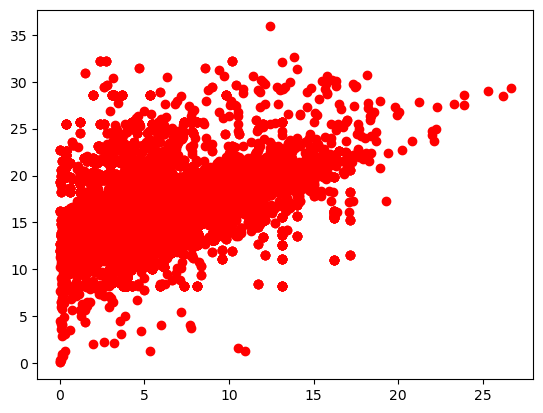

In [5]:
plt.plot(LEPR_CPX_GLASS['MgO value_Liq'], 
         LEPR_CPX_GLASS['MgO value'], 'or')

## Post review figure of what labs did what

In [6]:
LEPR_CPX_GLASS['Laboratory'].str[0:30]

0        University of California at Be
1        University of California at Be
2        University of California at Be
3        University of California at Be
4        University of California at Be
                      ...              
25596             University of Chicago
25597             University of Chicago
25598             University of Chicago
25599             University of Chicago
25600    Lamont Doherty Earth Institute
Name: Laboratory, Length: 25601, dtype: object

In [7]:
LEPR_CPX_GLASS['Laboratory_short']=LEPR_CPX_GLASS['Laboratory'].str[0:40]
LEPR_CPX_GLASS['Laboratory_short'].head()

C:\Users\penny\AppData\Local\Temp\ipykernel_23824\1706300197.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  LEPR_CPX_GLASS['Laboratory_short']=LEPR_CPX_GLASS['Laboratory'].str[0:40]


0    University of California at Berkeley
1    University of California at Berkeley
2    University of California at Berkeley
3    University of California at Berkeley
4    University of California at Berkeley
Name: Laboratory_short, dtype: object

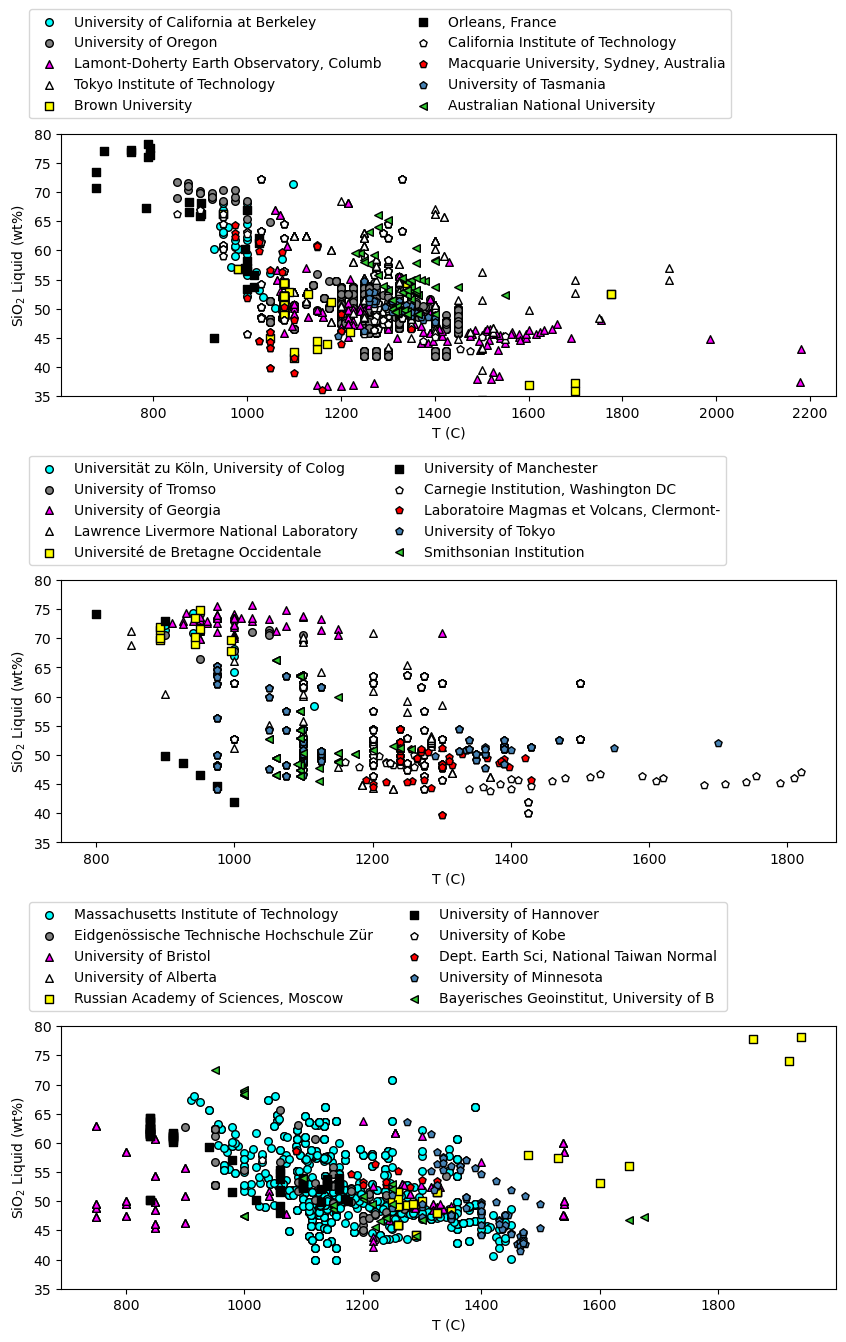

In [8]:
color=['cyan','grey', 'magenta', 'white', 'yellow',  'black',
       'white', 'red', 'steelblue', 'limegreen']
marker=['o', 'o', '^', '^', 's', 's', 'p', 'p', 'p', '<', '>']
ncolor=0
nmarker=0
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15))
for lab in LEPR_CPX_GLASS['Laboratory_short'].unique()[0:10]: 
    in_lab=LEPR_CPX_GLASS['Laboratory_short']==lab
    ax1.scatter(LEPR_CPX_GLASS['T (C)'].loc[in_lab],
                LEPR_CPX_GLASS['SiO2 value_Liq'].loc[in_lab],
             s=30,
          ec='k', marker=marker[nmarker],
             fc=color[ncolor],
             label=lab)
    ncolor=ncolor+1
    nmarker=nmarker+1
ax1.set_ylim([35, 80])

ax1.legend(bbox_to_anchor=(-0.05, 1.5), loc='upper left', ncol=2)
ax1.set_ylabel('SiO$_2$ Liquid (wt%)')
ax1.set_xlabel('T (C)')

# Next 10
ncolor=0
nmarker=0
for lab in LEPR_CPX_GLASS['Laboratory_short'].unique()[10:20]: 
    in_lab=LEPR_CPX_GLASS['Laboratory_short']==lab
    ax2.scatter(LEPR_CPX_GLASS['T (C)'].loc[in_lab],
                LEPR_CPX_GLASS['SiO2 value_Liq'].loc[in_lab],
             s=30,
          ec='k', marker=marker[nmarker],
             fc=color[ncolor],
             label=lab)
    ncolor=ncolor+1
    nmarker=nmarker+1
ax2.set_ylim([35, 80])

ax2.legend(bbox_to_anchor=(-0.05, 1.5), loc='upper left', ncol=2)
ax2.set_ylabel('SiO$_2$ Liquid (wt%)')
ax2.set_xlabel('T (C)')


# Next 10
ncolor=0
nmarker=0
for lab in LEPR_CPX_GLASS['Laboratory_short'].unique()[20:30]: 
    in_lab=LEPR_CPX_GLASS['Laboratory_short']==lab
    ax3.scatter(LEPR_CPX_GLASS['T (C)'].loc[in_lab],
                LEPR_CPX_GLASS['SiO2 value_Liq'].loc[in_lab],
             s=30,
          ec='k', marker=marker[nmarker],
             fc=color[ncolor],
             label=lab)
    ncolor=ncolor+1
    nmarker=nmarker+1
ax3.set_ylim([35, 80])

ax3.legend(bbox_to_anchor=(-0.05, 1.5), loc='upper left', ncol=2)
ax3.set_ylabel('SiO$_2$ Liquid (wt%)')
ax3.set_xlabel('T (C)')


plt.subplots_adjust(
                    hspace=0.7)

fig.savefig('SiO2_Temp_Lab1.png', dpi=200)


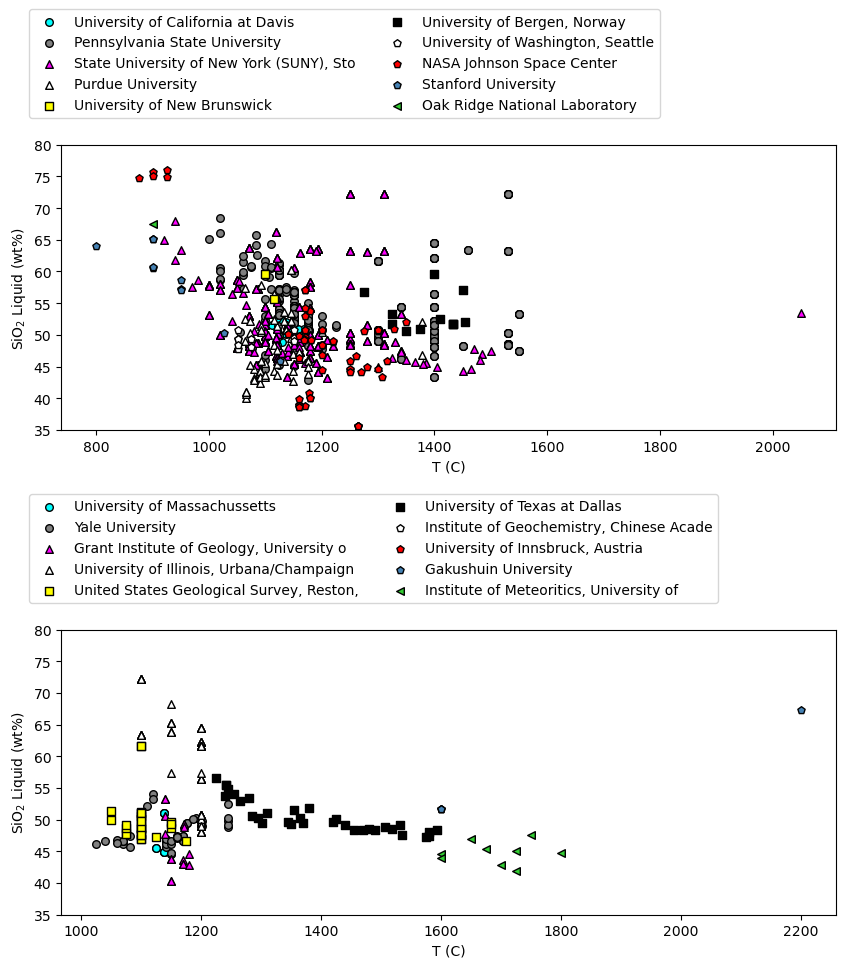

In [9]:
color=['cyan','grey', 'magenta', 'white', 'yellow',  'black',
       'white', 'red', 'steelblue', 'limegreen']
marker=['o', 'o', '^', '^', 's', 's', 'p', 'p', 'p', '<', '>']
ncolor=0
nmarker=0
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
for lab in LEPR_CPX_GLASS['Laboratory_short'].unique()[30:40]: 
    in_lab=LEPR_CPX_GLASS['Laboratory_short']==lab
    ax1.scatter(LEPR_CPX_GLASS['T (C)'].loc[in_lab],
                LEPR_CPX_GLASS['SiO2 value_Liq'].loc[in_lab],
             s=30,
          ec='k', marker=marker[nmarker],
             fc=color[ncolor],
             label=lab)
    ncolor=ncolor+1
    nmarker=nmarker+1
ax1.set_ylim([35, 80])

ax1.legend(bbox_to_anchor=(-0.05, 1.5), loc='upper left', ncol=2)
ax1.set_ylabel('SiO$_2$ Liquid (wt%)')
ax1.set_xlabel('T (C)')

# Next 10
ncolor=0
nmarker=0
for lab in LEPR_CPX_GLASS['Laboratory_short'].unique()[40:50]: 
    in_lab=LEPR_CPX_GLASS['Laboratory_short']==lab
    ax2.scatter(LEPR_CPX_GLASS['T (C)'].loc[in_lab],
                LEPR_CPX_GLASS['SiO2 value_Liq'].loc[in_lab],
             s=30,
          ec='k', marker=marker[nmarker],
             fc=color[ncolor],
             label=lab)
    ncolor=ncolor+1
    nmarker=nmarker+1
ax2.set_ylim([35, 80])

ax2.legend(bbox_to_anchor=(-0.05, 1.5), loc='upper left', ncol=2)
ax2.set_ylabel('SiO$_2$ Liquid (wt%)')
ax2.set_xlabel('T (C)')


plt.subplots_adjust(
                    hspace=0.7)

fig.savefig('SiO2_Temp_Lab2.png', dpi=200)

In [73]:
for lab in LEPR_CPX_GLASS['Laboratory_short'].unique()[30:40]:
    print(lab)

University of California at Davis
Pennsylvania State University
State University of New York (SUNY), Sto
Purdue University
University of New Brunswick
University of Bergen, Norway
University of Washington, Seattle
NASA Johnson Space Center
Stanford University
Oak Ridge National Laboratory


In [5]:
LEPR_Stitched_15kbar=LEPR_Stitched1.loc[LEPR_Stitched1[x]<=13]

NameError: name 'x' is not defined

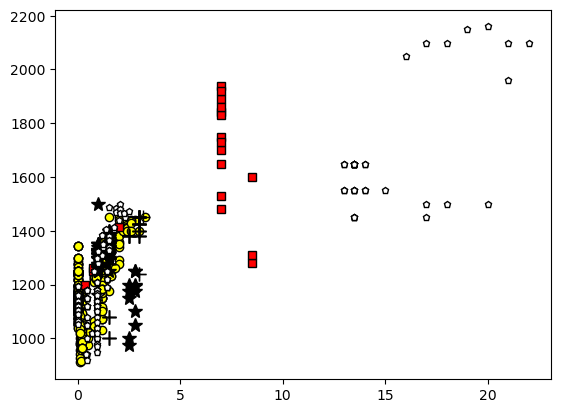

In [6]:
x='P (GPa)'
y='T (C)'
MIT=LEPR_Stitched1['Laboratory']=="Massachusetts Institute of Technology"
RNAS=LEPR_Stitched1['Laboratory']=="Russian Academy of Sciences, Moscow"
Lamont=LEPR_Stitched1['Laboratory']=="Lamont Doherty Earth Institute of Columbia University"
TAS=LEPR_Stitched1['Laboratory']=="University of Tasmania"
ANU=LEPR_Stitched1['Laboratory']=="Research School of Earth Sciences, Australian National University (ANU), Canberra, Australia"
SUNY=LEPR_Stitched1['Laboratory']=="State University of New York (SUNY), Stony Brook"
plt.plot(LEPR_Stitched1[x].loc[MIT],
         LEPR_Stitched1[y].loc[MIT],
         'ok', mfc='yellow')
         
plt.plot(LEPR_Stitched1[x].loc[RNAS],
         LEPR_Stitched1[y].loc[RNAS],
         'sk', mfc='red')
plt.plot(LEPR_Stitched1[x].loc[Lamont],
         LEPR_Stitched1[y].loc[Lamont],
         '*k', mfc='grey', ms=10)
plt.plot(LEPR_Stitched1[x].loc[TAS],
         LEPR_Stitched1[y].loc[TAS],
         '*k', mfc='k', ms=10)
plt.plot(LEPR_Stitched1[x].loc[ANU],
         LEPR_Stitched1[y].loc[ANU],
         '+k', mfc='k', ms=10)
plt.plot(LEPR_Stitched1[x].loc[SUNY],
         LEPR_Stitched1[y].loc[SUNY],
         'pk', mfc='w', ms=5)

In [38]:
LEPR_CPX_GLASS.columns.unique()#
#.head()

Index(['Index_Liq', 'Experiment', 'Citation_Liq', 'Label_Liq', 'Spatial_Liq',
       'Number of analyses_Liq', 'SiO2 value_Liq', 'SiO2 error_Liq',
       'SiO2 method_Liq', 'SiO2 units_Liq',
       ...
       'H value', 'H error', 'H method', 'H units', 'H standard', 'D value',
       'D error', 'D method', 'D units', 'D standard'],
      dtype='object', length=987)

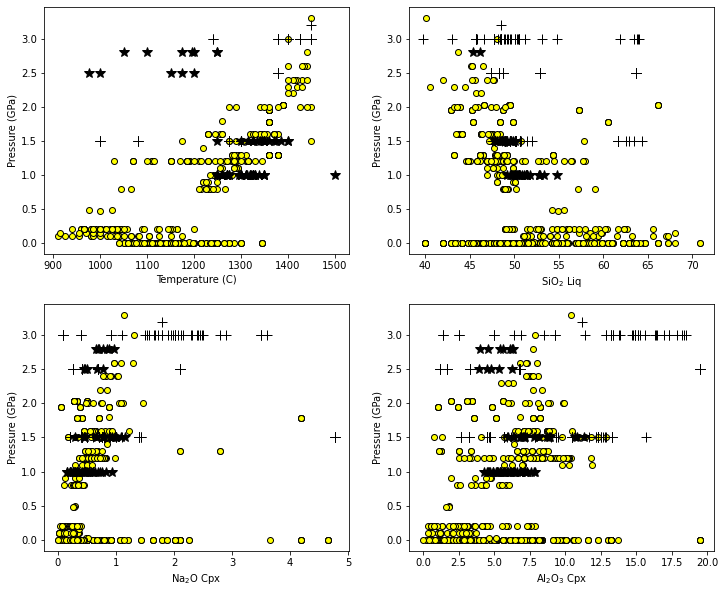

In [76]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here

MIT=LEPR_CPX_GLASS['Laboratory']=="Massachusetts Institute of Technology"
RNAS=LEPR_CPX_GLASS['Laboratory']=="Russian Academy of Sciences, Moscow"
Lamont=LEPR_CPX_GLASS['Laboratory']=="Lamont Doherty Earth Institute of Columbia University"
TAS=LEPR_CPX_GLASS['Laboratory']=="University of Tasmania"
ANU=LEPR_CPX_GLASS['Laboratory']=="Research School of Earth Sciences, Australian National University (ANU), Canberra, Australia"
SUNY=LEPR_CPX_GLASS['Laboratory']=="State University of New York (SUNY), Stony Brook"
x='T (C)'#'SiO2 value_Liq'
y='P (GPa)' #'P (GPa)'

ax0.plot(LEPR_CPX_GLASS[x].loc[MIT],
         LEPR_CPX_GLASS[y].loc[MIT],
         'ok', mfc='yellow')
ax0.plot(LEPR_CPX_GLASS[x].loc[ANU],
         LEPR_CPX_GLASS[y].loc[ANU],
         '+k', mfc='k', ms=10)         

ax0.plot(LEPR_CPX_GLASS[x].loc[TAS],
         LEPR_CPX_GLASS[y].loc[TAS],
        '*k', mfc='k', ms=10)
ax0.set_xlabel('Temperature (C)')
ax0.set_ylabel('Pressure (GPa)')
######

x='SiO2 value_Liq'#'SiO2 value_Liq'
y='P (GPa)' #'P (GPa)'

ax1.plot(LEPR_CPX_GLASS[x].loc[MIT],
         LEPR_CPX_GLASS[y].loc[MIT],
         'ok', mfc='yellow')
ax1.plot(LEPR_CPX_GLASS[x].loc[ANU],
         LEPR_CPX_GLASS[y].loc[ANU],
         '+k', mfc='k', ms=10)         

ax1.plot(LEPR_CPX_GLASS[x].loc[TAS],
         LEPR_CPX_GLASS[y].loc[TAS],
        '*k', mfc='k', ms=10)
ax1.set_xlabel('SiO$_2$ Liq')
ax1.set_ylabel('Pressure (GPa)')

y='P (GPa)'#'SiO2 value_Liq'
x='Na2O value' #'P (GPa)'

ax2.plot(LEPR_CPX_GLASS[x].loc[MIT],
         LEPR_CPX_GLASS[y].loc[MIT],
         'ok', mfc='yellow')
ax2.plot(LEPR_CPX_GLASS[x].loc[ANU],
         LEPR_CPX_GLASS[y].loc[ANU],
         '+k', mfc='k', ms=10)         

ax2.plot(LEPR_CPX_GLASS[x].loc[TAS],
         LEPR_CPX_GLASS[y].loc[TAS],
        '*k', mfc='k', ms=10)
ax2.set_xlabel('Na$_2$O Cpx')
ax2.set_ylabel('Pressure (GPa)')


y='P (GPa)'#'SiO2 value_Liq'
x='Al2O3 value' #'P (GPa)'

ax3.plot(LEPR_CPX_GLASS[x].loc[MIT],
         LEPR_CPX_GLASS[y].loc[MIT],
         'ok', mfc='yellow')
ax3.plot(LEPR_CPX_GLASS[x].loc[ANU],
         LEPR_CPX_GLASS[y].loc[ANU],
         '+k', mfc='k', ms=10)         

ax3.plot(LEPR_CPX_GLASS[x].loc[TAS],
         LEPR_CPX_GLASS[y].loc[TAS],
        '*k', mfc='k', ms=10)
ax3.set_xlabel('Al$_2$O$_3$ Cpx')
ax3.set_ylabel('Pressure (GPa)')
fig.savefig('Nonuniform_Experiments.png', dpi=200)

In [10]:
LEPR_Stitched_15kbarx, LEPR_Stitched_15kbar['T (C)'], 
                                                      

,Index_x,Experiment,Citation_x,Date,Label,Spatial,Number of analyses,SiO2 value,SiO2 error,SiO2 method,SiO2 units,SiO2 standard,TiO2 value,TiO2 error,TiO2 method,TiO2 units,TiO2 standard,Al2O3 value,Al2O3 error,Al2O3 method,Al2O3 units,Al2O3 standard,Fe2O3 value,Fe2O3 error,Fe2O3 method,Fe2O3 units,Fe2O3 standard,Cr2O3 value,Cr2O3 error,Cr2O3 method,Cr2O3 units,Cr2O3 standard,FeO value,FeO error,FeO method,FeO units,FeO standard,MnO value,MnO error,MnO method,MnO units,MnO standard,MgO value,MgO error,MgO method,MgO units,MgO standard,NiO value,NiO error,NiO method,NiO units,NiO standard,CoO value,CoO error,CoO method,CoO units,CoO standard,CaO value,CaO error,CaO method,CaO units,CaO standard,Na2O value,Na2O error,Na2O method,Na2O units,Na2O standard,K2O value,K2O error,K2O method,K2O units,K2O standard,P2O5 value,P2O5 error,P2O5 method,P2O5 units,P2O5 standard,H2O value,H2O error,H2O method,H2O units,H2O standard,CO2 value,CO2 error,CO2 method,CO2 units,CO2 standard,D2O value,D2O error,D2O method,D2O units,D2O standard,Fe83Si17 value,Fe83Si17 error,Fe83Si17 method,Fe83Si17 units,Fe83Si17 standard,FeSi value,FeSi error,FeSi method,FeSi units,FeSi standard,FeS value,FeS error,FeS method,FeS units,FeS standard,WO3 value,WO3 error,WO3 method,WO3 units,WO3 standard,ReO3 value,ReO3 error,ReO3 method,ReO3 units,ReO3 standard,Mg(OH)2 value,Mg(OH)2 error,Mg(OH)2 method,Mg(OH)2 units,Mg(OH)2 standard,Tb2O3 value,Tb2O3 error,Tb2O3 method,Tb2O3 units,Tb2O3 standard,OH value,OH error,OH method,OH units,OH standard,He value,He error,He method,He units,He standard,Ne value,Ne error,Ne method,Ne units,Ne standard,Ar value,Ar error,Ar method,Ar units,Ar standard,Kr value,Kr error,Kr method,Kr units,Kr standard,Xe value,Xe error,Xe method,Xe units,Xe standard,H value,H error,H method,H units,H standard,D value,D error,D method,D units,D standard,Index_y,Citation_y,Laboratory,Notes,Rock type,Device,Container,Material,Doped,P (GPa),err P (GPa),fO2 condition,fO2 value,fO2 error,T (C),err T (C),Duration (hours),Phases,Public,Type
0,52,Jor46.20,"Barclay, J., Carmichael, I.S.E. (2004) A hornb...",2004,Clinopyroxene 1,NaN,NaN,51.200001,0.011,EMP,wt%,Not Specified,0.86,0.27,EMP,wt%,Not Specified,2.50,0.090,EMP,wt%,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.90,0.090,EMP,wt%,Not Specified,0.12,0.02,EMP,wt%,Not Specified,15.50,0.070,EMP,wt%,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.290001,0.23,EMP,wt%,Not Specified,0.460,0.09,EMP,wt%,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,"Barclay, J., Carmichael, I.S.E. (2004) A hornb...",University of California at Berkeley,NaN,NaN,IHPV,AgPd,NaN,n,0.2320,5.0,-7.3,-7.300000,NaN,1060.0,5.0,49.00,ol+cpx+spn+ap,y,LEPR
1,53,Jor46.5,"Barclay, J., Carmichael, I.S.E. (2004) A hornb...",2004,Clinopyroxene 1,NaN,NaN,50.700001,0.013,EMP,wt%,Not Specified,0.85,0.04,EMP,wt%,Not Specified,2.70,0.010,EMP,wt%,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.80,0.010,EMP,wt%,Not Specified,0.12,0.02,EMP,wt%,Not Specified,15.80,0.010,EMP,wt%,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.100000,0.22,EMP,wt%,Not Specified,0.380,0.07,EMP,wt%,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,"Barclay, J., Carmichael, I.S.E. (2004) A hornb...",University of Californ

In [9]:
LEPR_Stitched_15kbar['Laboratory'].unique()

array(['University of California at Berkeley', 'University of Oregon',
       'Lamont-Doherty Earth Observatory, Columbia University',
       'Tokyo Institute of Technology', 'Brown University',
       'Orleans, France', 'California Institute of Technology',
       'Macquarie University, Sydney, Australia',
       'University of Tasmania', 'Australian National University',
       'Universität zu Köln, University of Cologne, Germany',
       'University of Tromso', 'University of Georgia',
       'Lawrence Livermore National Laboratory',
       'Université de Bretagne Occidentale', 'University of Manchester',
       'Carnegie Institution, Washington DC',
       'Laboratoire Magmas et Volcans, Clermont-Ferrand, France',
       'University of Tokyo', 'Smithsonian Institution',
       'Massachusetts Institute of Technology',
       'Eidgenössische Technische Hochschule Zürich, Swiss Federal Institute of Technology in Zurich',
       'University of Bristol', 'University of Alberta',
       

## Comparing number at Hannover before and after

In [8]:
100*(sum(LEPR_Stitched_15kbar['Laboratory']=="University of Hannover")/
len(LEPR_Stitched_15kbar['Laboratory']))

1.198377581120944

In [9]:
100*(sum(Cpx_Glass_filt['Laboratory']=="Hannover")/
len(Cpx_Glass_filt['Laboratory']))

40.0

In [10]:
100*(sum(LEPR_Stitched_15kbar['Laboratory']=="Massachusetts Institute of Technology")/
len(LEPR_Stitched_15kbar['Laboratory']))

10.435103244837759

In [11]:
100*(sum(Cpx_Glass_filt['Laboratory']=="MIT")/
len(Cpx_Glass_filt['Laboratory']))

10.53763440860215

## Number of analyses

In [20]:
len(Cpx_Glass['N'])

852

In [26]:
len(Cpx_Glass.loc[(Cpx_Glass['N_meas_Cpx']>0)&(newMask)&
                  (Cpx_Glass['P_kbar_x']<13)] )

459

In [27]:
len(Cpx_Glass.loc[(Cpx_Glass['N_meas_Cpx']>0)&(~newMask)&
                  (Cpx_Glass['P_kbar_x']<13)] )

295

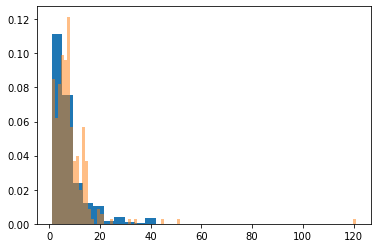

In [33]:
plt.hist(Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']>0)&(newMask)&
                  (Cpx_Glass['P_kbar_x']<13)], density=True)

plt.hist(Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']>0)&(~newMask)&
                  (Cpx_Glass['P_kbar_x']<13)], density=True, alpha=0.5, bins=100);

In [34]:
np.mean(
Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']>0)&(newMask)&
                  (Cpx_Glass['P_kbar_x']<13)]
)

7.786492374727668

In [36]:
np.median(
Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']>0)&(newMask)&
                  (Cpx_Glass['P_kbar_x']<13)]
)

6.0

In [35]:
np.mean(
Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']>0)&(~newMask)&
                  (Cpx_Glass['P_kbar_x']<13)]
)

8.145762711864407

In [37]:
np.median(
Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']>0)&(~newMask)&
                  (Cpx_Glass['P_kbar_x']<13)]
)

6.0

In [39]:
len_dataset=len(
Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']>0)&
                  (Cpx_Glass['P_kbar_x']<13)]
)

In [46]:
Length1=len(Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']==1)&
                  (Cpx_Glass['P_kbar_x']<13)])
Length1

40

In [47]:
Length1/len_dataset

0.05305039787798409

In [49]:
Length2=len(Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']==2)&
                  (Cpx_Glass['P_kbar_x']<13)])
Length2

47

In [50]:
Length2/len_dataset

0.0623342175066313

In [51]:
Length3=len(Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']==3)&
                  (Cpx_Glass['P_kbar_x']<13)])
Length3

67

In [52]:
Length3/len_dataset

0.08885941644562334

In [53]:
Length4=len(Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']==4)&
                  (Cpx_Glass['P_kbar_x']<13)])
Length4

77

In [54]:
Length4/len_dataset

0.10212201591511937

In [56]:
Length5=len(Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx'].between(0.5, 5.5))&
                  (Cpx_Glass['P_kbar_x']<13)])
Length5

325

In [57]:
Length5/len_dataset

0.43103448275862066

In [59]:
Length10=len(Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']>=10)&
                  (Cpx_Glass['P_kbar_x']<13)])
Length10

325

In [60]:
Length10/len_dataset

0.2519893899204244

In [61]:
Length20=len(Cpx_Glass['N_meas_Cpx'].loc[(Cpx_Glass['N_meas_Cpx']>=20)&
                  (Cpx_Glass['P_kbar_x']<13)])
Length20

39

In [62]:
Length20/len_dataset

0.05172413793103448